# Get the connector to dremio with the class DremioQueryMakerJDBC

In [1]:
%run /home/ubuntu/notebooks/covid-prj01-data-analysis/[UTILS]/dremio-access-new.py
dremio = DremioQueryMakerJDBC()
index = dremio.getIndex()
display(index)

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,VIEW_DEFINITION
0,DREMIO,Covid-Lake,Disease Indicator,SELECT * FROM global_dataset
1,DREMIO,Covid-Lake,Institution,SELECT * FROM logical_entity
2,DREMIO,Covid-Lake,News & Trends,SELECT * FROM logical_entity
3,DREMIO,Covid-Lake,Socioeconomic Factors,SELECT * FROM logical_entity
4,DREMIO,covidlake-raw,brasil_io,"SELECT *\nFROM ""brasil.io"""
5,DREMIO,covidlake-raw,cities,"SELECT * FROM ""Base Coordenadas Brasil.csv"""
6,DREMIO,covidlake-raw,google_trends,"SELECT * FROM ""google_trends.parquet"""
7,DREMIO,covidlake-raw,health_ministry,SELECT * FROM health_ministry
8,DREMIO,covidlake-raw,hospitals_dimension,"SELECT * FROM ""hospitals.csv"""
9,DREMIO,covidlake-raw,mobility_apple,SELECT * FROM apple_mobility_trends


# Get tables by index number

In [3]:
mg = dremio.getTable(4)
mg.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,BR,Brazil,,,2020-02-15,5,4,-5,8,6,0
1,BR,Brazil,,,2020-02-16,2,3,-13,3,0,1
2,BR,Brazil,,,2020-02-17,-2,0,-12,9,19,-1
3,BR,Brazil,,,2020-02-18,-3,-1,-11,9,15,-1
4,BR,Brazil,,,2020-02-19,-1,-2,-5,8,14,-1


(81, 8)


/home/ubuntu/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/ubuntu/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


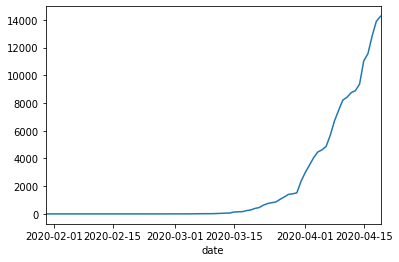

In [66]:
ca = dremio.getTable(2)
ca["date"] = ca["date"].astype(str)
null_filter = ~ca["date"].eq("1588377600000000")
sp_filter_1 = ca["estado"].eq("SP")
ca = ca[null_filter]
ca["date"] = pd.to_datetime(ca["date"]).dt.date
print(ca[sp_filter_1].shape)
ca[sp_filter_1].set_index("date")["casosAcumulados"].plot(kind = "line")

(72, 11)


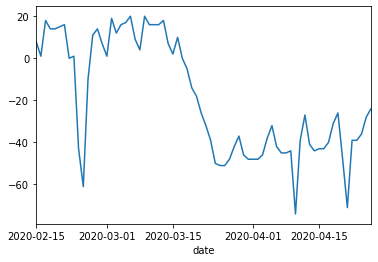

In [72]:
mobility = "workplaces_percent_change_from_baseline"
mg[mobility] = mg[mobility].astype(float)
mg["date"] = pd.to_datetime(mg["date"]).dt.date
sp_filter_2 = mg["sub_region_1"].eq("State of São Paulo")
print(mg[sp_filter_2].shape)
mg[sp_filter_2].set_index("date")[mobility].plot(kind = "line")

(88, 17)


/home/ubuntu/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,workplaces_percent_change_from_baseline,casosNovos
workplaces_percent_change_from_baseline,1.000000,-0.577069
casosNovos,-0.577069,1.000000


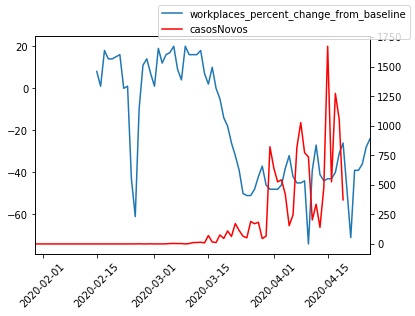

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
join = pd.concat([mg[sp_filter_2].set_index("date"), ca[sp_filter_1].set_index("date")], axis = 1)
print(join.shape)
display(join[[mobility, "casosNovos"]].corr())
ax = join[mobility].plot(kind = "line", legend=False)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax2 = ax.twinx()
join["casosNovos"].plot(kind = "line", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()